# credit card approval prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Credit_card.csv")

In [4]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [5]:
label = pd.read_csv("Credit_card_label.csv")

In [6]:
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [7]:
data = data.merge(label,on = "Ind_ID", how = "left")

# left joint 0 label means approved 1 means Rejected

In [8]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [10]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# for numerical summary data.describe()

In [12]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [13]:
data.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

# droping a column

In [15]:
data.drop(columns = ("Type_Occupation"), inplace = True)

In [17]:
data.isna().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [19]:
data.dropna(inplace = True)

In [20]:
data.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [21]:
data.duplicated().sum()

np.int64(0)

# average income 

In [23]:
average_income = data["Annual_income"].mean()
average_income

np.float64(190775.04846256683)

In [24]:
gender_income = data.groupby("GENDER")["Annual_income"].mean()
gender_income

GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64

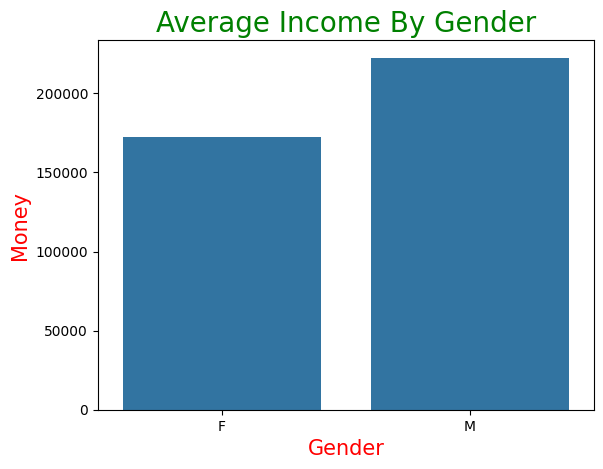

In [30]:
sns.barplot(x= gender_income.index,y= gender_income.values)
plt.title("Average Income By Gender",c = 'g',size = 20)
plt.xlabel("Gender",c='red',size = 15)
plt.ylabel("Money",c='red',size = 15)
plt.show()

In [31]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


In [33]:
label_count = data["label"].value_counts()
label_count

label
0    1336
1     160
Name: count, dtype: int64

# percentage of credit approved

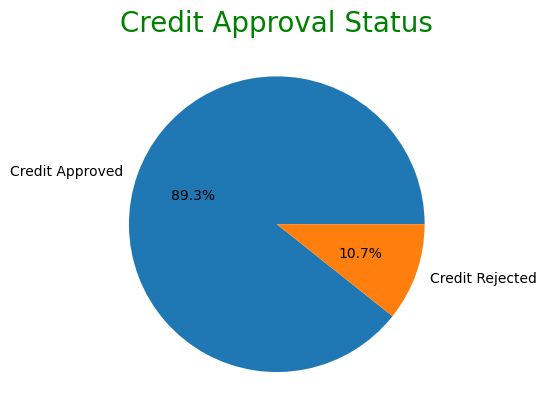

In [38]:
plt.pie(label_count,labels = ["Credit Approved","Credit Rejected"],autopct = "%1.1f%%")
plt.title("Credit Approval Status",c = 'g',size = 20)
plt.show()

In [40]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


In [44]:
data.groupby("Type_Income")["Annual_income"].mean()

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

In [46]:
data.groupby("Marital_status")["Employed_days"].max()

Marital_status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employed_days, dtype: int64

In [47]:
data.groupby("Housing_type")["Family_Members"].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [49]:
data.groupby("GENDER")["Birthday_count"].min()*-1

GENDER
F    24946.0
M    24662.0
Name: Birthday_count, dtype: float64

In [51]:
data.groupby("Propert_Owner")["Annual_income"].mean()

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

In [52]:
data.groupby("EDUCATION")["Mobile_phone"].max()

EDUCATION
Academic degree                  1
Higher education                 1
Incomplete higher                1
Lower secondary                  1
Secondary / secondary special    1
Name: Mobile_phone, dtype: int64

In [53]:
data.groupby("CHILDREN")["Annual_income"].sum()

CHILDREN
0     191703172.5
1      64218600.0
2      26226900.0
3       2845800.0
4        180000.0
14       225000.0
Name: Annual_income, dtype: float64

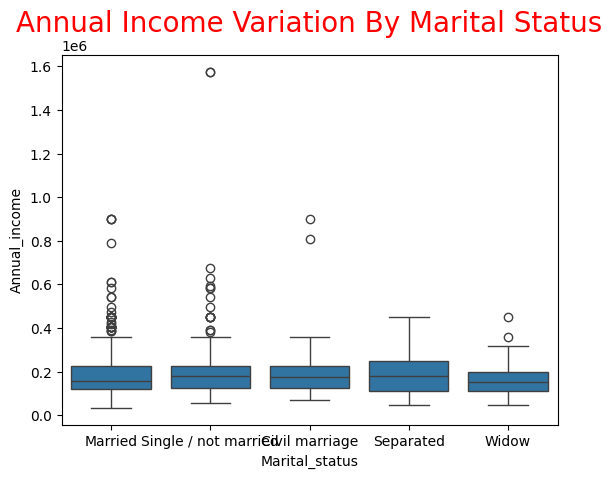

In [55]:
sns.boxplot(x= "Marital_status",y= "Annual_income",data = data)
plt.title("Annual Income Variation By Marital Status", c = 'r',size = 20)
plt.show()

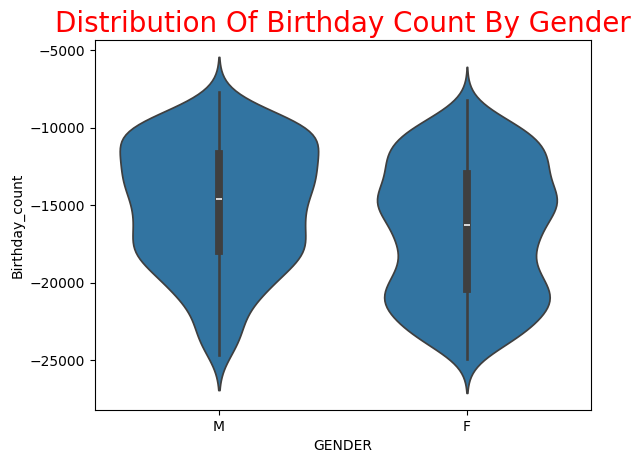

In [56]:
sns.violinplot(x= "GENDER",y= "Birthday_count",data = data)
plt.title("Distribution Of Birthday Count By Gender",c='r',size = 20)
plt.show()

In [57]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


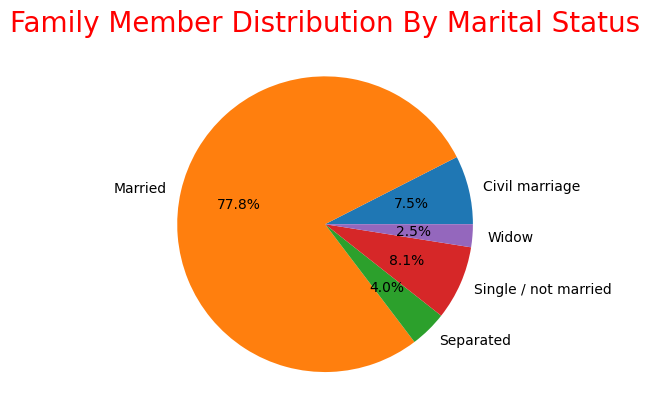

In [62]:
data.groupby("Marital_status")["Family_Members"].sum().plot(kind = "pie",autopct = "%1.1f%%")
plt.title("Family Member Distribution By Marital Status",c = 'r',size = 20)
plt.ylabel("")
plt.show()

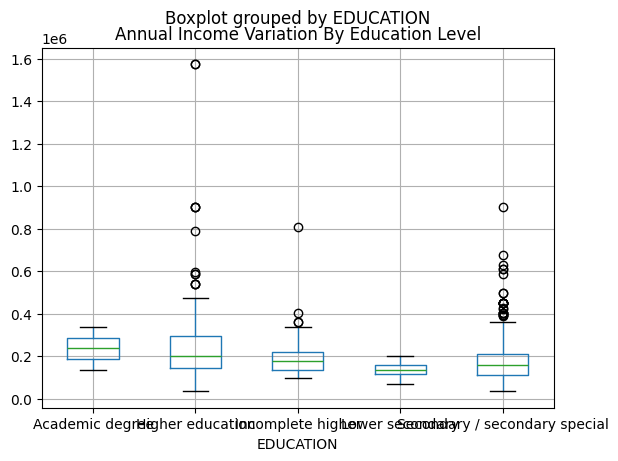

In [64]:
data.boxplot(column = "Annual_income",by = "EDUCATION")
plt.title("Annual Income Variation By Education Level")
plt.show()

In [65]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,2,0


In [67]:
data = data[["Car_Owner","Propert_Owner","Annual_income","EDUCATION","label"]]

In [68]:
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1
6,Y,N,315000.0,Higher education,1
7,N,N,180000.0,Secondary / secondary special,1
...,...,...,...,...,...
1542,Y,N,360000.0,Secondary / secondary special,0
1544,N,N,225000.0,Incomplete higher,0
1545,Y,Y,180000.0,Higher education,0
1546,Y,N,270000.0,Secondary / secondary special,0


In [69]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [ ]:
data = 